In [ ]:
import pandas as pd

# Load your dataset from a CSV file (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('FB_auto_testing.csv')

# Drop rows after row 32495 because they contain the unnecessory text data
data.drop(range(32496, len(data)), inplace=True)

# Display the first few rows of the dataset to get an overview
print(data.head())

# Check for missing values and handle them if necessary
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# If there are missing values, you can choose to drop or fill them
# For example, you can fill missing numerical values with the mean
data.fillna(data.mean(), inplace=True)

# Separate the target variable (e.g., 'Target Lambda') from the predictors
X = data.drop(columns=['Target Lambda'])
y = data['Target Lambda']

# Now, you have X (predictor variables) and y (target variable) ready for model training


  Time (sec)  RPM Air Temp (C) Coolant Temp (C) TPS (%) MAP (kPa)  \
0          0  329           45               89       1    101.77   
1       0.02  329           45               89     1.1    102.46   
2       0.04  329           45               89     1.6    103.01   
3       0.06  329           45               89     2.1    103.56   
4       0.08  329           45               89     2.4    112.11   

  Fuel Open Time (ms) Accel Compensation - Fuel (%)  \
0                4.91                           100   
1                4.91                           100   
2                4.91                           100   
3                4.91                           100   
4                4.91                           100   

  Starting Compensation - Fuel (%)  Coolant Temp Compensation - Fuel (%)  \
0                            110.6                                 108.1   
1                            110.6                                 108.1   
2                         

<ipython-input-14-cedf39079c4c>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
print(len(data))

32496


# Feature Engineering

<ipython-input-16-33306a144b3f>:12: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = X.corrwith(y)


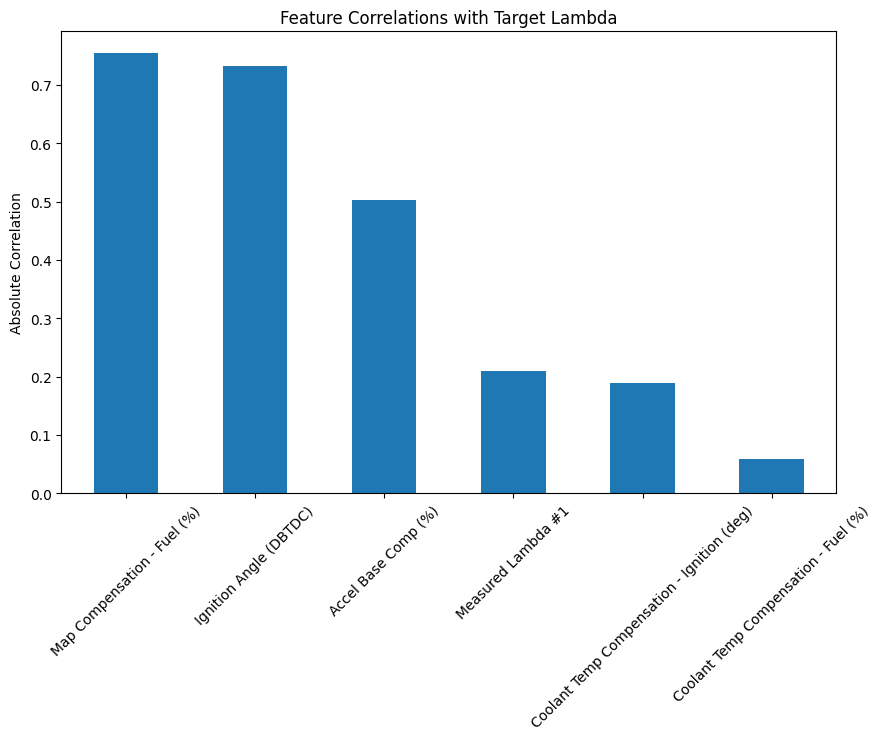

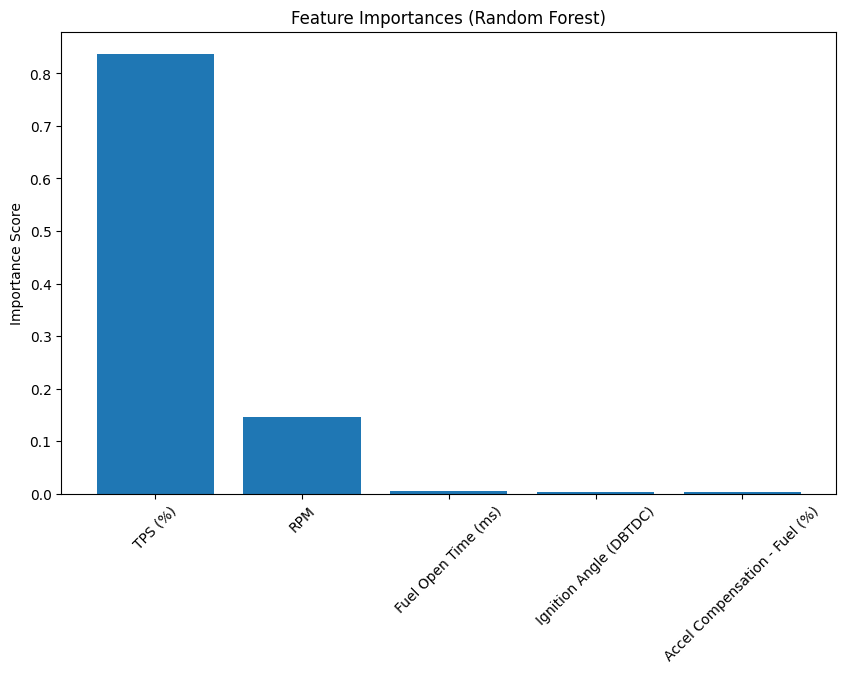

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Calculate feature correlations with the target variable ("Target Lambda")
correlations = X.corrwith(y)

# Sort features by their absolute correlation with the target
correlations = correlations.abs().sort_values(ascending=False)

# Plot feature correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Feature Correlations with Target Lambda')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.show()

# Select the top N features based on correlation (you can choose an appropriate threshold)
top_n_features = 5
selected_features_corr = correlations.index[:top_n_features]

# Perform feature selection using a tree-based model (Random Forest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Sort features by their importance score
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(top_n_features), feature_importances[indices][:top_n_features])
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance Score')
plt.xticks(range(top_n_features), X.columns[indices][:top_n_features], rotation=45)
plt.show()

# Select the top N features based on feature importance
selected_features_rf = X.columns[indices][:top_n_features]

# Combine both methods or choose one based on your preference
selected_features = set(selected_features_corr) | set(selected_features_rf)

# Now, 'selected_features' contains the features you've chosen for your model
# You can use these features to train your machine learning model


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
# Adjust the test_size parameter to control the proportion of data in the test set
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Test set - X:", X_test.shape, "y:", y_test.shape)


Training set - X: (25996, 9) y: (25996,)
Test set - X: (6500, 9) y: (6500,)


<ipython-input-17-2095902d2b0e>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression MSE:", mse_linear)
print("Linear Regression R-squared:", r2_linear)


Linear Regression MSE: 8.822420177312805e-05
Linear Regression R-squared: 0.8683174369052468


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree MSE:", mse_decision_tree)
print("Decision Tree R-squared:", r2_decision_tree)


Decision Tree MSE: 8.107692307692399e-06
Decision Tree R-squared: 0.9878985393757822


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest MSE:", mse_random_forest)
print("Random Forest R-squared:", r2_random_forest)


Random Forest MSE: 4.131673846153785e-06
Random Forest R-squared: 0.9938331048510681
